Name : Raymond Visconti

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import PIL  # might need to do `conda/pip install Pillow`
import emcee
import corner

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

# Problem 1 (35 points)
For this problem, we will look at the importance of rescaling data and dimensionality reduction using principal component analysis (PCA) for classifying highly-dimensional data using $K$-means clustering.

We are going to use a dataset that contains different quanlities of wine, and classifies them as coming from one of three different cultivators. The properties are things like alcohol content, presence of certain minerals, and color of the wine (quantified numerically). If you would like more information, refer to the [documentation about the dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset).

## a. (5 points)
Read in the dataset. Get both the `data` (the data for each wine in each category) and `target` (which cultivator they are from), and save them as variables to use for training.

In [30]:
loaded_data = load_wine()
data = loaded_data.data
target = loaded_data.target

assert data.shape == (178, 13)
assert target.shape == (178,)


## b. (5 points)
Perform a multi-dimensional fit on the data using $K$-means clustering (i.e., with no dimensionality reduction). Note that there are 3 classes, so you should perform a fit using that many clusters.

In [31]:
# Initialize the KMeans model with 3 clusters and explicitly set n_init
# n_clusters=3 since there are 3 classes of wine
# n_init=10 to match current default and suppress the FutureWarning
k_means = KMeans(n_clusters=3, n_init=10)

# Fit the model to the data
k_means.fit(data)

KMeans(n_clusters=3, n_init=10)

## c. (5 points)
Compare the output of the $K$-means fit with the labels of the data (contained in `target`). How does the labeling of the predicted classes agree with the actual labels? (_N.B._: You may have to permute the labeling between the output of the `KMeans` function and the `target` values, as the labeling in `KMeans` is arbitrary.)

In [32]:
# Obtain the cluster centers and labels from the KMeans model
cluster_centers = k_means.cluster_centers_
k_means_labels = k_means.labels_

print("K-means labels:\n", k_means_labels)
print("Actual labels:\n", target)

from scipy.stats import mode

labels = np.zeros_like(k_means_labels)
for i in range(3):
    mask = (k_means_labels == i)
    labels[mask] = mode(target[mask])[0]

# Compare the adjusted K-means labels with the actual labels
print("Adjusted K-means labels:\n", labels)

accuracy = np.sum(labels == target) / len(target)
print(f"Accuracy: {accuracy:.2f}")


K-means labels:
 [2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 2 0 0
 2 2 0 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 1 0 1 1 0 0 0 1 1 2
 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1]
Actual labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Adjusted K-means labels:
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 

# add some words commenting on the output! 
Response : The output shows the K-means clustering labels compared to the actual wine cultivator labels. The K-means algorithm, being unsupervised, assigns arbitrary labels, so a matching process is required to align these with the actual labels. The accuracy of 0.70 indicates that, after adjusting, the clustering corresponds with the true labels 70% of the time. This suggests that the clustering captures some patterns related to the actual wine classes, but it's not perfectly aligned due to the limitations of K-means.

## d. (5 points)
Repeat the fit using $K$-means clustering, but this time perform PCA using 2 principal components to reduce the dimensionality of your data. Do _not_ rescale the data first (we will do this later!).

In [33]:
pca = PCA(n_components=2)

# Fit PCA on the data
pca.fit(data)

new_data = pca.transform(data)

# Apply K-means clustering on the PCA-transformed data
new_k_means = KMeans(n_clusters=3, n_init=10)
new_k_means.fit(new_data)

new_k_means_labels = new_k_means.labels_

print("K-means labels after PCA:\n", new_k_means_labels)
print("Actual labels:\n", target)

# Compare the adjusted K-means labels with the actual labels (same approach as before)
labels_pca = np.zeros_like(new_k_means_labels)
for i in range(3):
    mask = (new_k_means_labels == i)
    labels_pca[mask] = mode(target[mask])[0]

# Accuracy of the clustering
accuracy_pca = np.sum(labels_pca == target) / len(target)
print(f"Accuracy after PCA: {accuracy_pca:.2f}")


K-means labels after PCA:
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 2 0 2 2 0 0 0 2 2 1
 0 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 0 2
 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0
 0 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 2]
Actual labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Accuracy after PCA: 0.70


## e. (5 points)
Make two scatter plots: (1) the data in the low-dimensional PCA space (i.e., the first two principal components) color-coded by the actual labels (i.e., the `target` values), and (2) the data color-coded by the predicted $K$-means classes (and the cluster centers). Does it seem like the $K$-means fit has done a good job?

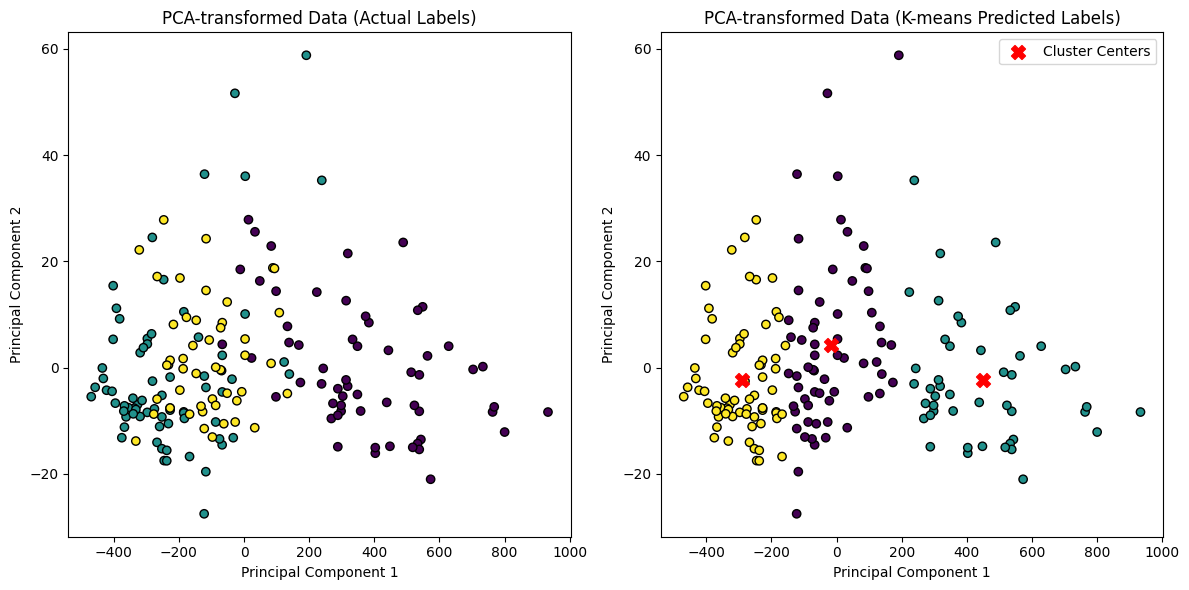

In [34]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Scatter plot 1: Data in PCA space, color-coded by actual labels
# X_pca contains the PCA-transformed data
X_pca = new_data

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=target, cmap='viridis', edgecolor='k')
ax1.set_title('PCA-transformed Data (Actual Labels)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Scatter plot 2: Data color-coded by K-means predicted classes
# Color-coding by K-means predicted labels
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=new_k_means_labels, cmap='viridis', edgecolor='k')
# Plotting cluster centers
cluster_centers_pca = new_k_means.cluster_centers_
ax2.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], s=100, c='red', marker='X', label='Cluster Centers')
ax2.set_title('PCA-transformed Data (K-means Predicted Labels)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()


plt.tight_layout()
plt.show()

## f. (5 points)
Redo part (d), but this time using a `StandardScaler` transformation before doing PCA.

In [37]:
scaler = StandardScaler()
scaler.fit(data)

# Transform the data using the scaler
X_scaled = scaler.transform(data)

# Initialize PCA with 2 components and fit it on the scaled data
pca_scaled = PCA(n_components=2)
pca_scaled.fit(X_scaled)

# Transform the scaled data to the new PCA space
X_pca_scaled = pca_scaled.transform(X_scaled)

# Apply K-means clustering on the PCA-transformed, scaled data
k_means_scaled = KMeans(n_clusters=3, n_init=10)
k_means_scaled.fit(X_pca_scaled)

new_k_means_labels_scaled = k_means_scaled.labels_
cluster_centers_pca_scaled = k_means_scaled.cluster_centers_  # This line was missing


# Adjust the K-means labels to match the original target labels
labels_scaled = np.zeros_like(new_k_means_labels_scaled)
for i in range(3):
    mask = (new_k_means_labels_scaled == i)
    labels_scaled[mask] = mode(target[mask])[0]

# Calculate the accuracy of the clustering
accuracy_scaled = np.sum(labels_scaled == target) / len(target)
print(f"Accuracy after scaling and PCA: {accuracy_scaled:.2f}")

print("K-means labels after scaling and PCA:\n", labels_scaled)
print("Actual labels:\n", target)


Accuracy after scaling and PCA: 0.97
K-means labels after scaling and PCA:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Actual labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## g. (5 points)
Redo part (e), but with the rescaled PCA data. Does it look better than before?

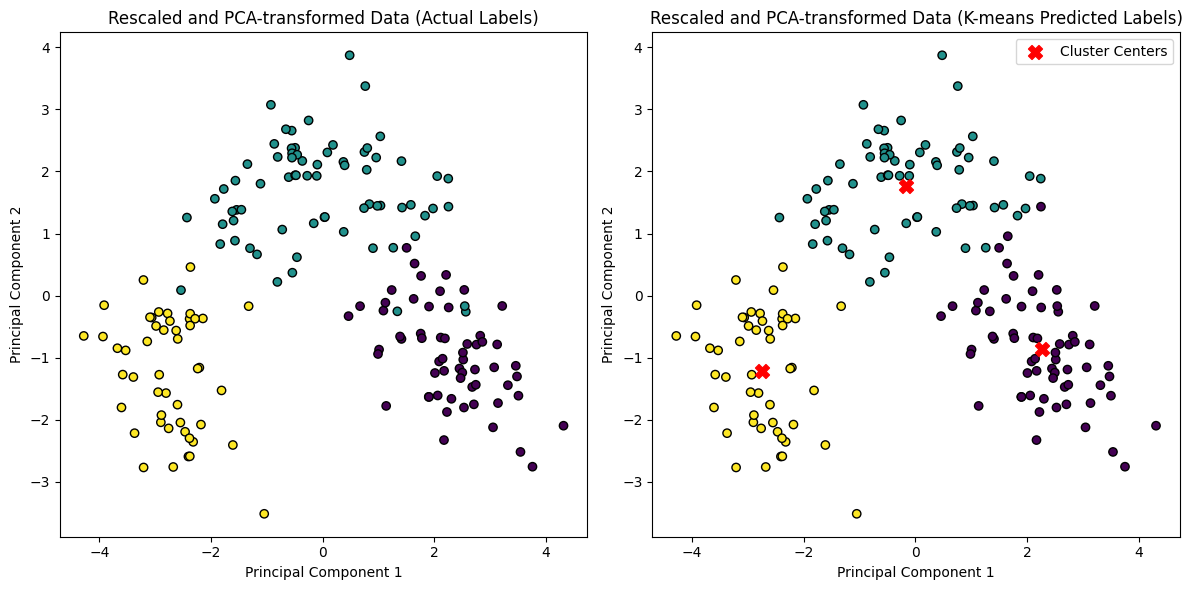

In [38]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Scatter plot 1: Rescaled data in PCA space, color-coded by actual labels
# X_pca_rescale contains the PCA-transformed and scaled data
ax1.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=target, cmap='viridis', edgecolor='k')
ax1.set_title('Rescaled and PCA-transformed Data (Actual Labels)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Scatter plot 2: Rescaled data color-coded by K-means predicted classes
# Color-coding by K-means predicted labels
ax2.scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], c=labels_scaled, cmap='viridis', edgecolor='k')
# Plotting cluster centers
ax2.scatter(cluster_centers_pca_scaled[:, 0], cluster_centers_pca_scaled[:, 1], s=100, c='red', marker='X', label='Cluster Centers')
ax2.set_title('Rescaled and PCA-transformed Data (K-means Predicted Labels)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Problem 2 (35 points)
We can use the two-dimensional fast Fourier transform (FFT) to filter and process image-based data. We will do some of these operations on data. We'll be using a sample image from SciPy as an example.

## a. (5 points)
Make a grayscale plot of the image to work with.

/var/folders/mq/w21qcldx4wl7nvp9xgd12q3m0000gn/T/ipykernel_50463/3651435826.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


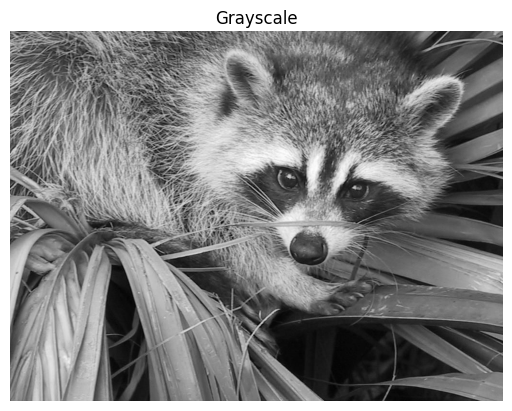

In [46]:
f = misc.face()

image = PIL.Image.fromarray(f)

# Make gray-scale
gray_image = image.convert("L")

# Normalize
gray_image = np.array(gray_image) / 255.0

fig = plt.figure()
ax = plt.gca()

ax.imshow(gray_image, cmap="gray")

plt.title('Grayscale')
plt.axis('off')

plt.show()

## b. (5 points)
Compute a 2D FFT of the image. You may use the `np.fft` module for the calculation. (_N.B._: Even though we could use the space-saving trick of a real FFT we talked about, use the "normal" FFT. It makes the rest of the problems easier!)

In [40]:
# Compute 2D FFT of the image data
fft_data = np.fft.fft2(gray_image)

# Verify the shape and data type of the fft_data
assert fft_data.shape == (768, 1024), "FFT data has incorrect shape."
assert fft_data.dtype == np.complex128, "FFT data has incorrect data type."

# fft_data is now ready for further processing


## c. (5 points)
Make 2 plots: (1) the amplitude of the resulting Fourier coefficients, and (2) the phase of the coefficients. (_N.B._: When making plots, it might be helpful to use the `np.fft.fftshift` function to make sure that the main features of the plot are centered on the resulting image. Also, when plotting the amplitude, you may find it helpful to use the `vmax=300` keyword argument to show the key features of the plot. You may find the `np.angle` function helpful for computing the phase.)

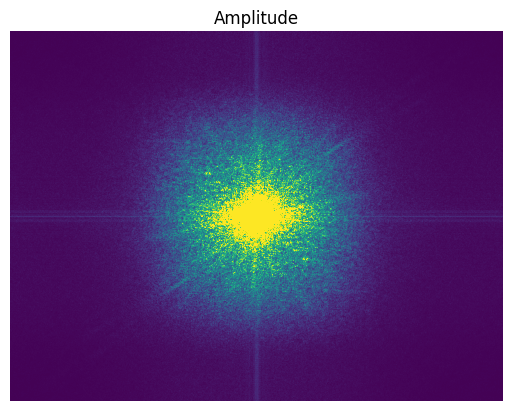

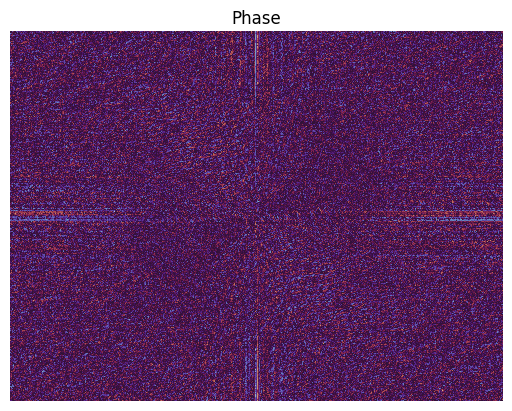

In [47]:
# Amplitude of the Fourier coefficients
fft_amp = np.fft.fftshift(np.abs(fft_data))

# First figure for amplitude
fig1 = plt.figure()
ax1 = plt.gca()
ax1.imshow(fft_amp, vmax=300, cmap="viridis")
plt.title('Amplitude')
plt.axis('off')

# Compute the phase of the Fourier coefficients
fft_phase = np.fft.fftshift(np.angle(fft_data))

# Create the second figure for phase
fig2 = plt.figure()
ax2 = plt.gca()
ax2.imshow(fft_phase, cmap="twilight")
plt.title('Phase')
plt.axis('off')

# Show the plots
plt.show()


## d. (5 points)
As we discussed, we can apply a Gaussian filter to our image by performing a convolution operation in Fourier space. Compute a Gaussian function (sometimes called a "smoothing kernel") that will operate in Fourier space. This should be the same size and as your `fft_data` array. It will be a two-dimensional, real-valued function of $x$ and $y$. It works best if it's normalized (i.e., so the largest value is 1), and requires a $\sigma$ that defines the approximate number of pixels included in a smoothing operation. Choose $\sigma = 30$, and plot your resulting Gaussian filter. (_N.B._: You may find it easier to define the filter so that it is centered on the center of the image. You can then use the `np.fft.fftshift` function before multiplying with the actual FFT data.)

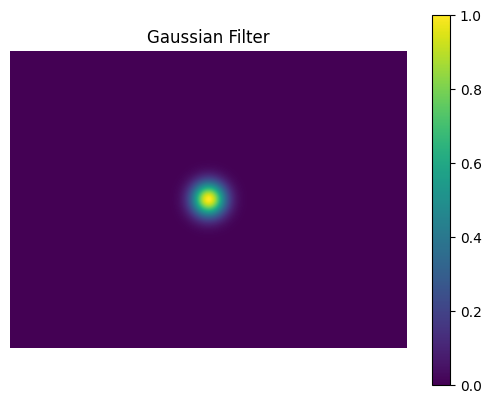

In [42]:
# Define the grid
x = np.arange(0, fft_data.shape[0])
y = np.arange(0, fft_data.shape[1])
XX, YY = np.meshgrid(x, y, indexing="ij")

# Center coordinates
xmu = fft_data.shape[0] // 2
ymu = fft_data.shape[1] // 2

# Define the Gaussian filter
sigma = 30
gaussian = np.exp(-((XX - xmu)**2 + (YY - ymu)**2) / (2 * sigma**2))
gaussian /= np.amax(gaussian)  # Normalize the Gaussian filter

# Ensure the Gaussian filter has the same shape as the fft_data
assert gaussian.shape == fft_data.shape

# Plot the Gaussian filter
plt.imshow(gaussian)
plt.colorbar()
plt.title('Gaussian Filter')
plt.axis('off')
plt.show()


## e. (5 points)
Apply your Gaussian filter to the FFT array. As noted above, you may need to use the `np.fft.fftshift` function to make sure your Guassian filter and FFT coefficients line up. Apply an inverse FFT to your convolved data, and plot the resulting image. (_N.B._: You may need to explicitly take the real component of the resulting array with the `.real` attribute.) Your output image should look like the `gaussian_blur.png` image.

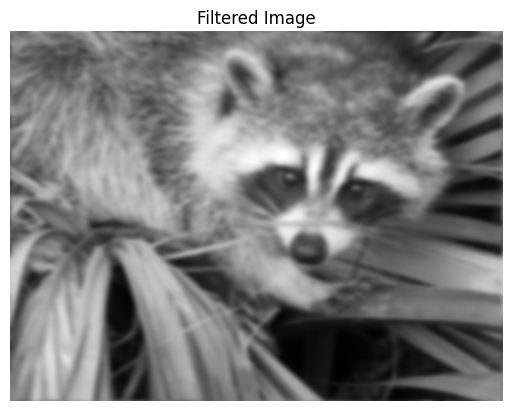

In [43]:
# Apply the Gaussian filter
filtered_data = np.fft.fftshift(gaussian) * fft_data

# Compute inverse FFT
filtered_image = np.fft.ifft2(filtered_data)

# Create the figure for the filtered image
fig = plt.figure()
ax = plt.gca()

# Display the real part of the filtered image
ax.imshow(filtered_image.real, cmap="gray")
plt.title('Filtered Image')
plt.axis('off')

plt.show()


## f. (5 points)
We can also perform operations known as "high-pass" or "low-pass" filtering, where we only preserve information in Fourier space on small scales or large scales (respectively). To do this, we need to know the length of our "Fourier vectors", which we can do with the `np.fft.fftfreq` function. We are going to build the one-dimensional arrays for each of our $x$- and $y$-dimensions, and then compute the magnitude of the vectors (which we need for the filtering).

Make an image of the data using a low-pass filter, where we only keep modes with $k = \sqrt{k_x^2 + k_y^2} < 0.01$. Your output image should look like `lowpass.png`.

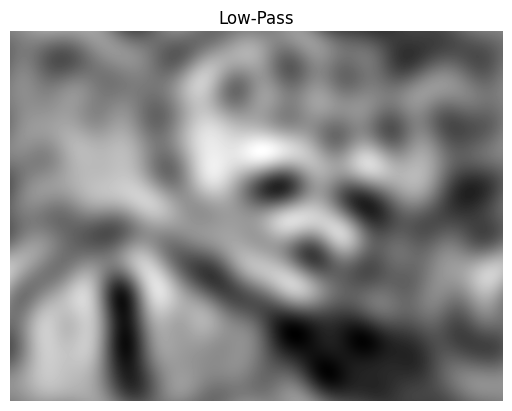

In [48]:
# Calculate the Fourier frequencies for x- and y-dimensions
kx = np.fft.fftfreq(fft_data.shape[0])
ky = np.fft.fftfreq(fft_data.shape[1])
KX, KY = np.meshgrid(kx, ky, indexing="ij")

# Compute the magnitude of the Fourier vectors
KK = np.sqrt(KX**2 + KY**2)

# Low-pass filter: preserve components with k < 0.01
threshold = 0.01
fft_lowpass = np.where(KK < threshold, fft_data, 0)

# Apply inverse FFT to the low-pass filtered data
lowpass_image = np.fft.ifft2(fft_lowpass)

fig = plt.figure()
ax = plt.gca()
ax.imshow(lowpass_image.real, cmap="gray")
plt.title('Low-Pass')
plt.axis('off')
plt.show()


## g. (5 points)
Repeat the same steps as in part (f), but now only keeping values where $k > 0.01$. Plot the resulting image. It should look like `highpass.png`.

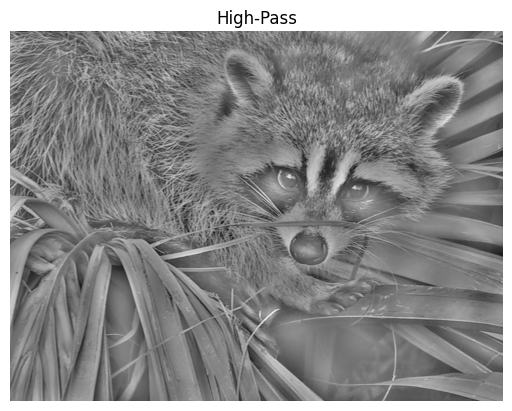

In [49]:
# High-pass filter: preserve components with k > 0.01
fft_highpass = np.where(KK > 0.01, fft_data, 0)

# Assert the shape of the high-pass FFT data
assert fft_highpass.shape == fft_data.shape

# Apply inverse FFT to the high-pass filtered data
highpass_image = np.fft.ifft2(fft_highpass)

fig = plt.figure()
ax = plt.gca()
ax.imshow(highpass_image.real, cmap="gray")
plt.title('High-Pass')
plt.axis('off')
plt.show()


# Problem 3 (30 points)

As we saw in class, MCMC is a useful general-purpose method for performing fits to data. We saw an example of fitting the slope and intercept of a line, but it's flexible enough to handle any model (including, for instance, a cubic polynomial...).

## a. (5 points)
Read in the data from `problem2.txt`. As usual, Column 0 is the $x$-values, Column 1 is the $y$-values, and Column 2 is the $y$-error bars.

In [50]:
data = np.loadtxt('problem2.txt')

x = data[:, 0]
y = data[:, 1]
yerr = data[:, 2]


## b. (10 points)
Define the functions that describe the (log) prior probabilities, the (log) posterior probabilities, and the (log) likelihood for our problem. As before, we want to assume a cubic model of the form:
$$
f(x; \vec{\theta}) = a_0 + a_1 x + a_2 x^2 + a_3 x^3,
$$
where $\vec{\theta} = (a_0, a_1, a_2, a_3)$. Assume a Gaussian likelihood, which includes the uncertainty on different values.

(_N.B._: The precise choice of priors should not matter, if we have a sufficiently long MCMC chain. For specificity, let us assume uniform priors for each of our parameters on the interval $-10 < a_i < 10$.)

In [51]:
def logprior(theta):
    """
    Compute the log prior based on the input values (theta).
    Assumes uniform priors for each parameter in the range [-10, 10].
    
    Parameters
    ----------
    theta : length-4 tuple
        The parameters of our model (a0, a1, a2, a3).

    Returns
    -------
    float
        The log prior probability. Returns -np.inf if any parameter
        is outside the range [-10, 10], otherwise returns 0.
    """
    a0, a1, a2, a3 = theta
    if -10 < a0 < 10 and -10 < a1 < 10 and -10 < a2 < 10 and -10 < a3 < 10:
        return 0  # log(1) = 0
    return -np.inf  # Outside the range: log(0) = -np.inf

def loglikelihood(theta, x, y, yerr):
    """
    Compute the log likelihood using a Gaussian model.
    
    Parameters
    ----------
    theta : length-4 tuple
        The parameters of our model (a0, a1, a2, a3).
    x : 1d array of floats
        The x values of our data.
    y : 1d array of floats
        The y values of our data.
    yerr : 1d array of floats
        The error values of our measurements.

    Returns
    -------
    float
        The log likelihood of our model based on the input values and our data.
    """
    a0, a1, a2, a3 = theta
    # Compute the model value for each x
    model = a0 + a1 * x + a2 * x**2 + a3 * x**3
    # Compute the Gaussian log likelihood
    sigma2 = yerr ** 2
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(2 * np.pi * sigma2))

def logposterior(theta, x, y, yerr):
    """
    Compute the log posterior probability based on the prior and likelihood values.
    
    Parameters
    ----------
    theta : length-4 tuple
        The parameters of our model.
    x : 1d array of floats
        The x values of our data.
    y : 1d array of floats
        The y values of our data.
    yerr : 1d array of floats
        The error values of our measurements.

    Returns
    -------
    float
        The log of the posterior probability.
    """
    lp = logprior(theta)
    # Check if the prior is finite
    if not np.isfinite(lp):
        return -np.inf  # If not, return -np.inf for the posterior
    # If prior is finite, calculate posterior as sum of log prior and log likelihood
    return lp + loglikelihood(theta, x, y, yerr)


## c. (5 points)
Run an MCMC chain with 32 walkers. Initialize your guess for the parameters as 0, with some random scatter. (_N.B._: Make sure the scatter is small enough that your parameters do not fall outside the region allowed by your priors!) Run for a few thousand steps.

In [52]:
n_walkers = 32  
n_dims = 4      
n_samples = 3000  


mu = 0  # Mean for the initial guess
sigma = 0.1  # Standard deviation for the initial guess
# Ensure the scatter is small enough to keep parameters within prior bounds
rng = np.random.default_rng()
init_vals = rng.normal(mu, sigma, size=(n_walkers, n_dims))

# Make sure initial values are within the prior bounds
init_vals = np.clip(init_vals, -10, 10)


arglist = (x, y, yerr)

sampler = emcee.EnsembleSampler(n_walkers, n_dims, logposterior, args=arglist)

sampler.run_mcmc(init_vals, n_samples, progress=True);


100%|██████████| 3000/3000 [00:01<00:00, 2076.12it/s]


## d. (5 points)
Make a corner plot of the resulting parameters.

/var/folders/mq/w21qcldx4wl7nvp9xgd12q3m0000gn/T/ipykernel_50463/742525352.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


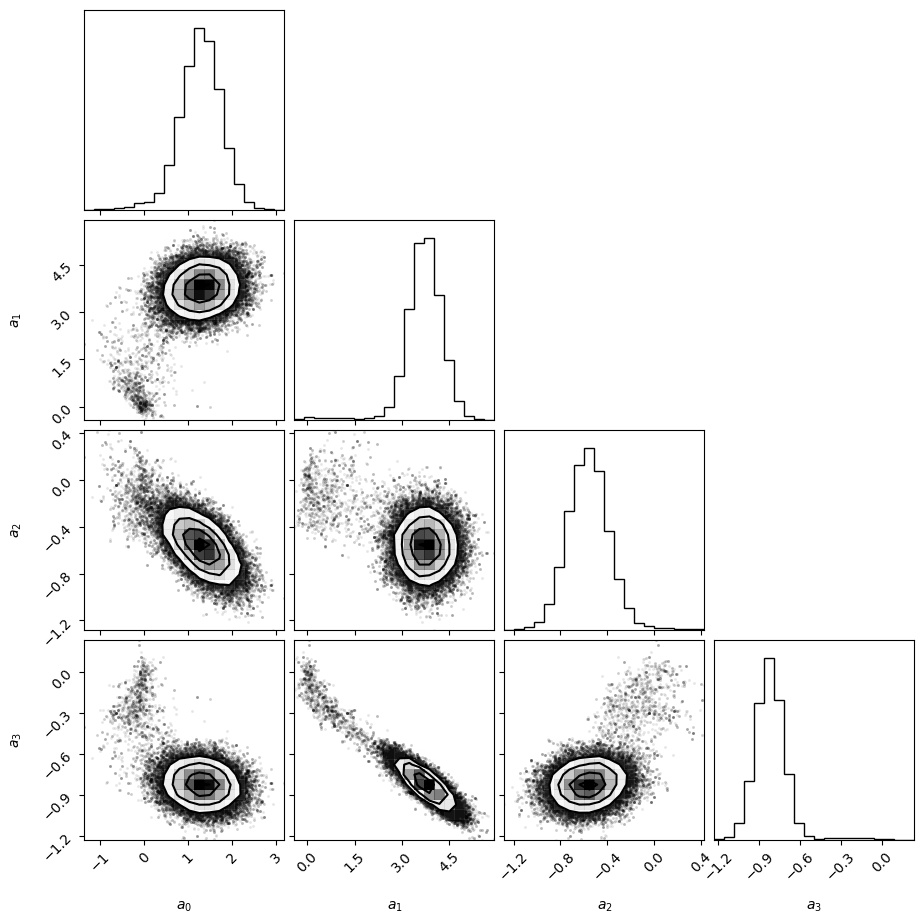

In [53]:
# Flatten the samples
# The chain has a shape of (n_walkers, n_samples, n_dims). We reshape it to (n_walkers * n_samples, n_dims)
flat_samples = sampler.get_chain(flat=True)

labels = ["$a_0$", "$a_1$", "$a_2$", "$a_3$"]

fig = corner.corner(flat_samples, labels=labels)

fig.show()

## e. (5 points)
Make a plot of the input data, along with 100 different random models sampled by the MCMC chains. To do this, you should select several points in your chain, and plot the resulting model associated with those parameters. Does it seem like the model is a good fit for the data?

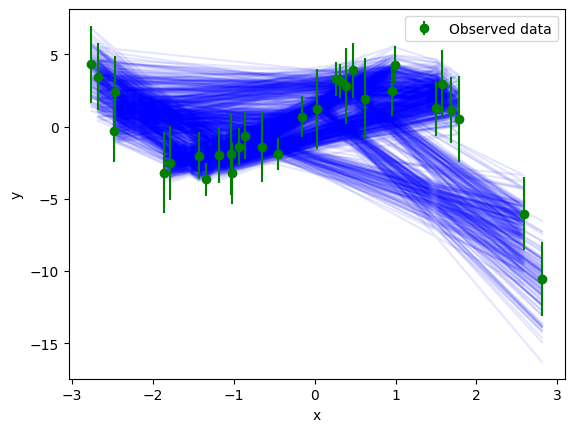

In [59]:
fig = plt.figure()
ax = plt.gca()

inds = rng.integers(len(flat_samples), size=100)

for ind in inds:
    sample = flat_samples[ind]
    a0, a1, a2, a3 = sample
    model_y = a0 + a1 * x + a2 * x**2 + a3 * x**3
    ax.plot(x, model_y, color="blue", alpha=0.1)

ax.errorbar(x, y, yerr=yerr, fmt='o', color='g', label='Observed data')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

plt.show()